# 1.この課題の目的
スクラッチを通してロジスティック回帰を理解する
分類問題についての基礎を学ぶ
以下の要件をすべて満たしていた場合、合格とします。

※Jupyter Notebookを使い課題に沿った検証や説明ができている。

# 2.スクラッチによる実装
NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。

# 【問題1】ロジスティック回帰のクラスを作成する
ロジスティック回帰のクラスを作成し、Sprint2で作成した分類のパイプラインに組み込んでください。

クラスの基本構造はSprint3の線形回帰を参考にし、名前はScratchLogisticRegressionとしてください。

メソッドやパラメータなどはscikit-learnを参考にしてください。推定関係ではラベルを出力するpredictメソッドと、確率を出力するpredict_probaメソッドの2種類を作成します。

[sklearn.linear_model.LinearRegression — scikit-learn 0.20.0 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

検証段階ではJupyter Notebook上で書いていき、最終的にはpyファイルにモジュールとしてまとめてください。

## シグモイド関数
コーディング

シグモイド関数を実装しましょう。

$$g(z) = \frac{1}{1+e^{−z}}.$$

## 目的関数
以下の数式で表されるロジスティック回帰の目的関数$J$を実装してください。この数式には正則化項が含まれています。

数式が見切れる場合、DIVERを全画面にして御覧ください

$$
h_θ(x) = g(θ^T x).\\
g(z) = \frac{1}{1+e^{−z}}.\\
J(\theta)=  \frac{1}{m}  \sum_{i=1}^{m}[−y^{(i)} log(h_θ(x^{(i)})) − (1−y^{(i)}) log(1−h_θ(x^{(i)}))] +
\frac{λ}{2m}\sum_{j=1}^n
θ^2_j.\\
$$

$m$: 入力されるデータの数

$h_\theta()$: 仮定関数

$x$: 特徴量ベクトル

\theta: パラメータベクトル

$g()$: シグモイド関数

$x^{(i)}$ : i番目のサンプルの特徴量ベクトル

$y^{(i)}$: i番目のサンプルの正解ラベル

$\theta_j$: j番目のパラメータ（重み）

$n$: 特徴量の数

$λ$: 正則化パラメータ

## 最急降下法
最急降下法により学習させてください。バイアス項およびj番目のパラメータの更新には以下の式を使います。

$$
\frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m}  \sum_{i=1}^{m}(h_θ(x^{(i)}) − y^{(i)})x_j^{(i)}  ,j = 0\\
\frac{\partial J(\theta)}{\partial \theta_j} = \biggl(\frac{1}{m}  \sum_{i=1}^{m}(h_θ(x^{(i)}) − y^{(i)})x_j^{(i)} \biggr) + \frac{λ}{m}\theta_j　 ,j\geq 1
$$

$i$: サンプルのインデックス

$j$: 特徴量のインデックス

In [1]:
# 各クラスをインポート
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import math

# 作成したロジスティック回帰モデルをインポート
from ScratchLogisticRegression import ScratchLogisticRegression

# 評価値のクラスをインポート
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# 決定領域を描画する際にしようするクラス
from matplotlib.colors import ListedColormap

## データ準備(シンプルデータセット1)

In [2]:
np.random.seed(seed=0)
n_samples = 500
f0= [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]

f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))

X = np.concatenate((f0, f1))
y = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)

random_index = np.random.permutation(np.arange(n_samples))
X = X[random_index]
y = y[random_index]

## データ分割

In [3]:
# train_test_splitメソッドにてデータを学習データとテストデータに分割　学習データは75%で設定
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0)

## インスタンスを作成

In [4]:
clf = ScratchLogisticRegression(num_iter=4000, lr=0.001, lam=0.01, bias=True, verbose=False)

## 学習

In [5]:
clf.fit(X_train, y_train, X_test, y_test)

## 予測

In [6]:
y_pred = clf.predict(X_test)

# 【問題2】学習曲線のプロット
まず、学習曲線を表示する関数を作成してください。

線形回帰クラスの雛形ではself.loss, self.val_lossに損失を記録しておくようになっているため、入力にはこれを利用してください。

プロット例

In [7]:
def plot_learning_curve(loss, val_loss, repeat_count):
    """
    学習曲線をプロットする

    Parameters
    ----------
    loss : 次の形のndarray, shape (1, self.iter)
      予測値と学習用データとの目的関数の値
    val_loss : 次の形のndarray, shape (1, self.iter)
      予測値と検証用データとの目的関数の値
      
    Return
    ----------
    
      """
    
    plt.plot(range(repeat_count), loss, label='loss')  # 学習用データとの目的変数との値の変化をプロットする
    plt.plot(range(repeat_count), val_loss, label='val_loss')# 検証用データとの目的変数との値の変化をプロットする
    
    plt.xlabel('repeat_count')# Xラベルの設定
    plt.ylabel('mse')# Xラベルの設定
    plt.title('Learning curve')# タイトルの設定
    
    plt.legend()# 凡例の表示
    
    return

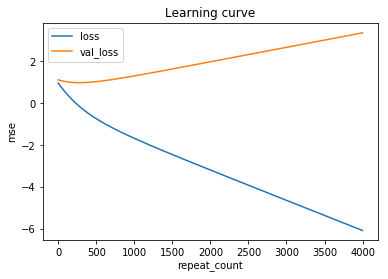

In [8]:
plot_learning_curve(clf.loss, clf.val_loss, clf.iter)

# 【問題3】指標値の算出
分類に関する指標値で精度を確認してください。

### Accuracy

In [9]:
accuracy_score(y_test, y_pred)

1.0

### Precision score

In [10]:
precision_score(y_test, y_pred)

1.0

### Recall score

In [11]:
recall_score(y_test, y_pred)

1.0

### F1 score

In [12]:
f1_score(y_test, y_pred)

1.0

# 【問題4】決定領域の可視化
2値分類のデータセットに対して決定領域を可視化してください。

## 今回は2クラスの分類の為、2種類のマーカと色を用意

In [13]:
markers = ('s', 'x')
cmap = ListedColormap(('red', 'blue'))

## データの最小値と最大値を確認し、メッシュデータを0.01刻みで作成

In [14]:
x1_min, x1_max = X_test[:, 0].min()-1, X_test[:, 0].max()+1
x2_min, x2_max = X_test[:, 1].min()-1, X_test[:, 1].max()+1
x1_mesh, x2_mesh = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                                   np.arange(x2_min, x2_max, 0.01))

## メッシュデータに対して作成したモデルで分類を実施

In [15]:
z = clf.predict(np.array([x1_mesh.ravel(), x2_mesh.ravel()]).T)
z = z.reshape(x1_mesh.shape)

## 決定領域を表示

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


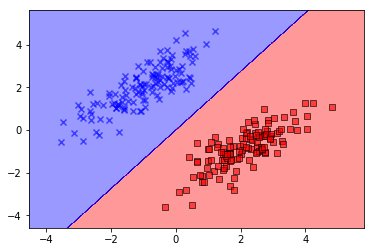

In [16]:
plt.contourf(x1_mesh, x2_mesh, z, alpha=0.4, cmap=cmap)
plt.xlim(x1_mesh.min(), x1_mesh.max())
plt.ylim(x2_mesh.min(), x2_mesh.max())

for idx, cl in enumerate(np.unique(y_test)):
    plt.scatter(x=X_test[y_test == cl, 0],
                y=X_test[y_test == cl, 1],
                alpha=0.6,
                c=cmap(idx),
                edgecolors='black',
                marker=markers[idx],
                label=cl);